Text(0, 0.5, 'dEI')

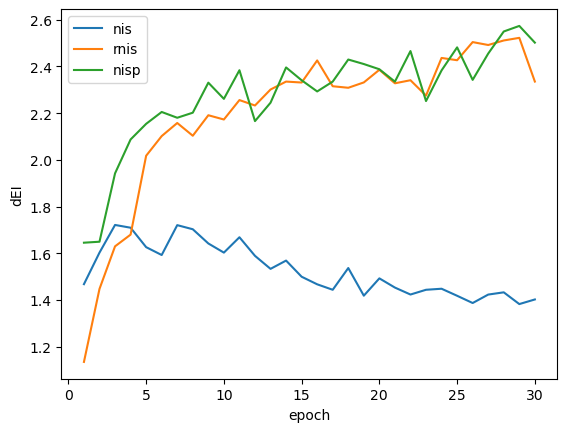

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [i+1 for i in range(30)]
test_id_nis = "nn_forecast_sir_iid_NISp_samp4000_sigma0.03_rho-0.5_lam1_dmodel64_0"
test_id_rnis = "maxei_sir_iid_maxei_RNIS_samp4000_sigma0.03_rho-0.5_lam0.1_dmodel64_0"
test_id_nisp = "maxei_sir_iid_maxei_NISp_samp4000_sigma0.03_rho-0.5_lam0.1_dmodel64_0"
ei_nis = np.load(f'../results/outputs/{test_id_nis}/EI.npy')
ei_rnis = np.load(f'../results/outputs/{test_id_rnis}/EI.npy')
ei_nisp = np.load(f'../results/outputs/{test_id_nisp}/EI.npy')
plt.plot(x, ei_nis, label='nis')
plt.plot(x, ei_rnis, label='rnis')
plt.plot(x, ei_nisp, label='nisp')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('dEI')

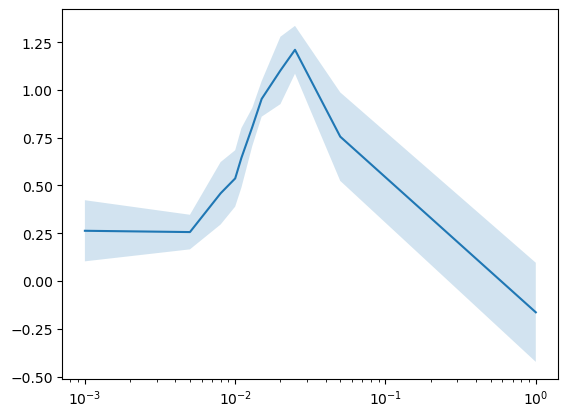

In [24]:
import numpy as np
import matplotlib.pyplot as plt
k=9
sigmas = [ 0.001, 0.005, 0.008, 0.01, 0.011, 0.013, 0.015, 0.02, 0.025, 0.05, 1.0]#[0.0001, 0.00025, 0.0005, 0.001, 0.0025, 0.005, 0.01,0.025, 0.05, 0.1]
ces = np.zeros([5, len(sigmas)])
ei4s = np.zeros([5, len(sigmas)])
ei2s = np.zeros([5, len(sigmas)])
for i in range(5):
    for j,sig in enumerate(sigmas):
        if sig < 0.05:
            test_id_4 = "maxei_sir_iid_noise_NISp_samp20000_sigma{0}_ls4_lam1.0_dmodel64_seed{1}".format(sig,2021+i)
            test_id_2 = "maxei_sir_iid_noise_NISp_samp20000_sigma{0}_ls2_lam1.0_dmodel64_seed{1}".format(sig,2021+i)
        else:
            test_id_4 = "maxei_sir_iid_noise_NISp_samp20000_sigma{0}_ls4_lam3.0_dmodel64_seed{1}".format(sig,2021+i)
            test_id_2 = "maxei_sir_iid_noise_NISp_samp20000_sigma{0}_ls2_lam3.0_dmodel64_seed{1}".format(sig,2021+i)
        ei4 = np.load(f'../results/outputs/{test_id_4}/EI.npy')
        ei2 = np.load(f'../results/outputs/{test_id_2}/EI.npy')
        ei4s[i,j] = ei4[k]
        ei2s[i,j] = ei2[k]
ces = ei2s - ei4s
ces_mean = np.mean(ces,axis=0)
ces_std = np.std(ces,axis=0)


plt.plot(sigmas, ces_mean, label='dCE')
plt.fill_between(sigmas, ces_mean-ces_std, ces_mean+ces_std, alpha=0.2)
#plt.plot(sigmas, ei4_ls, label='ei4')
#plt.plot(sigmas, ei2_ls, label='ei2')
plt.xscale("log")
#plt.legend()
#plt.xlabel('sigmas')
#plt.ylabel('dCE')